In [10]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
from sklearn.decomposition import PCA
import scipy.io
import itertools
import os
import h5py
import pyret.visualizations as pyviz
import pyret.filtertools as ft
import pyret.spiketools as st
import pyret.stimulustools as stimtools
import jetpack
from scipy.stats import zscore
import pdb
import string
# from jetpack.signals import peakdet
from scipy.signal import find_peaks_cwt
from os.path import expanduser

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlabel, ylabel, title, imshow

# note that nonposx(y) for log plots will no longer work with this package
import mpld3
#mpld3.enable_notebook()

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/lane/.local/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
data_file = expanduser('~/experiments/data/16-05-17/tpinknoise.h5')

In [11]:
with h5py.File(data_file, 'r') as f:
    stim = zscore(np.array(f['train/stimulus']))
    response = np.array(f['train/response/firing_rate_10ms'])

In [12]:
stim.shape

(60099, 50, 50)

In [13]:
response.shape

(7, 60099)

In [77]:
stas = []
batchsize = 1000
filterlength = 40
for c in range(response.shape[0]):
    sta = np.zeros((filterlength, stim.shape[1], stim.shape[2]))
    for t in range(filterlength, response.shape[1]):
        sta += response[c, t] * stim[(t-filterlength):t]
    stas.append(sta)

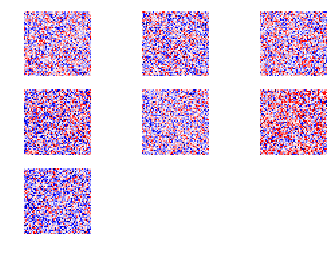

In [78]:
%matplotlib inline
num_cols = 3
num_rows = 3
ncells = response.shape[0]
idxs = range(num_cols)
for y in range(num_cols):
    for i in range(num_rows):
        plt_idx = i * num_cols + y + 1
        if plt_idx <= ncells:
            try:
                space, temporal_filters = ft.decompose(stas[plt_idx-1] - np.mean(stas[plt_idx-1]))
            except:
                space = np.zeros((50,50))

            plt.subplot(num_rows, num_cols, plt_idx)
            plt.imshow(space - np.mean(space), cmap='seismic')
            plt.axis('off')

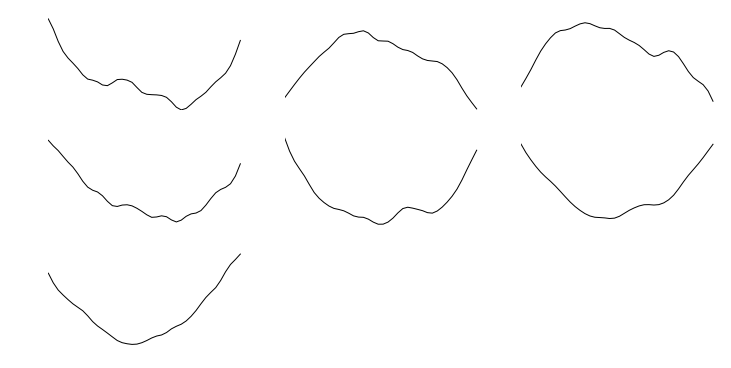

In [79]:
# %matplotlib inline
fig = plt.gcf()
fig.set_size_inches((12,6))
num_cols = 3
num_rows = 3
idxs = range(num_cols)
for y in range(num_cols):
    for i in range(num_rows):
        plt_idx = i * num_cols + y + 1
        if plt_idx <= ncells:
            try:
                space, temporal_filters = ft.decompose(stas[plt_idx-1] - np.mean(stas[plt_idx-1]))
            except:
                temporal_filters = np.zeros((filter_length,))

            plt.subplot(num_rows, num_cols, plt_idx)
            plt.plot(temporal_filters, 'k')
            plt.axis('off')
# mpld3.display()

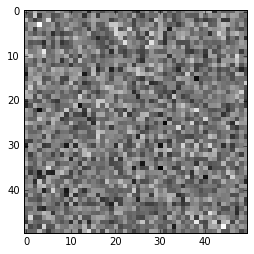

In [74]:
plt.imshow(stas[0][20])

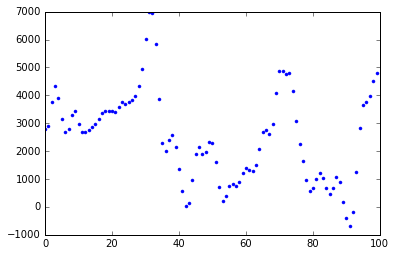

In [75]:
plt.plot(stas[4][:,25,25], '.')

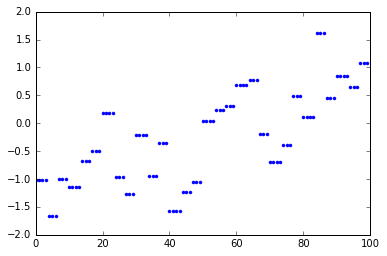

In [76]:
plt.plot(stim[:100, 25, 25], '.')

In [80]:
data_file = expanduser('~/experiments/data/16-05-17/spinknoise.h5')

In [81]:
with h5py.File(data_file, 'r') as f:
    stim = zscore(np.array(f['train/stimulus']))
    response = np.array(f['train/response/firing_rate_10ms'])

In [82]:
stas = []
batchsize = 1000
filterlength = 40
for c in range(response.shape[0]):
    sta = np.zeros((filterlength, stim.shape[1], stim.shape[2]))
    for t in range(filterlength, response.shape[1]):
        sta += response[c, t] * stim[(t-filterlength):t]
    stas.append(sta)

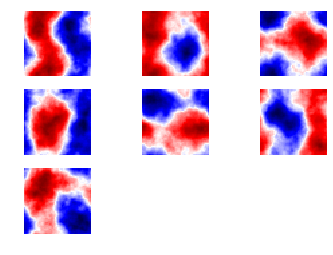

In [83]:
%matplotlib inline
num_cols = 3
num_rows = 3
ncells = response.shape[0]
idxs = range(num_cols)
for y in range(num_cols):
    for i in range(num_rows):
        plt_idx = i * num_cols + y + 1
        if plt_idx <= ncells:
            try:
                space, temporal_filters = ft.decompose(stas[plt_idx-1] - np.mean(stas[plt_idx-1]))
            except:
                space = np.zeros((50,50))

            plt.subplot(num_rows, num_cols, plt_idx)
            plt.imshow(space - np.mean(space), cmap='seismic')
            plt.axis('off')

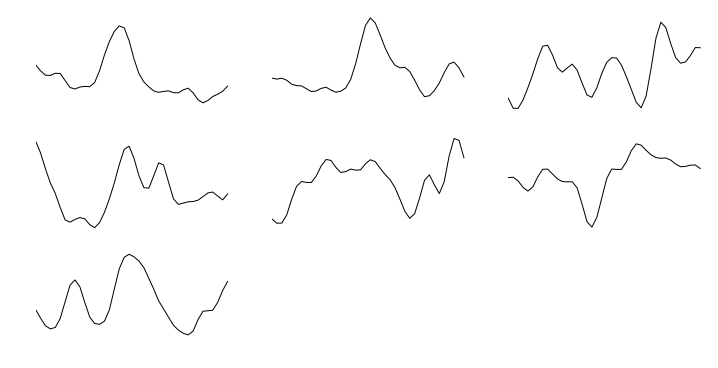

In [84]:
# %matplotlib inline
fig = plt.gcf()
fig.set_size_inches((12,6))
num_cols = 3
num_rows = 3
idxs = range(num_cols)
for y in range(num_cols):
    for i in range(num_rows):
        plt_idx = i * num_cols + y + 1
        if plt_idx <= ncells:
            try:
                space, temporal_filters = ft.decompose(stas[plt_idx-1] - np.mean(stas[plt_idx-1]))
            except:
                temporal_filters = np.zeros((filter_length,))

            plt.subplot(num_rows, num_cols, plt_idx)
            plt.plot(temporal_filters, 'k')
            plt.axis('off')
# mpld3.display()